In [0]:
%sh
pip install habanero
pip install networkx

You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f4e7eddf-4169-40c2-8906-f4a9c21f9ec4/bin/python -m pip install --upgrade pip' command.
  Using cached networkx-3.1-py3-none-any.whl (2.1 MB)
You should consider upgrading via the '/local_disk0/.ephemeral_nfs/envs/pythonEnv-f4e7eddf-4169-40c2-8906-f4a9c21f9ec4/bin/python -m pip install --upgrade pip' command.


In [0]:
import pyspark.sql.functions as F
import graphframes as gf
import networkx as nx
import matplotlib.pyplot as plt
import requests
import json
from habanero import Crossref
from pyspark.sql.types import StringType, IntegerType, ArrayType
import time


spark.conf.set("spark.sql.shuffle.partitions", sc.defaultParallelism)

In [0]:
raw_df = spark.read.format("delta").load("/user/hive/warehouse/scientific_publications")
display(raw_df.limit(25))

_id abstract authors doi fos isbn issn issue keywords lang n_citation page_end page_start pdf references title url venue volume year 53e99784b7602d9701f3e3f5 null null null null null null null List() en 0 null null null null 3GIO. null List(null, null, null, null, null, null, null, null, null, null, null, null, 0) null 2011 53e99784b7602d9701f3e133 Drought is the first place in all the natural disasters in the world. It is especially serious in North China Plain. In this paper, different soil water content control levels at winter wheat growth stages are performed on Gucheng Ecological-Meteorological Integrated Observation Experiment Station of CAMS, China. Some canopy parameters, including growth conditions, dry weight, physiological parameters and hyperspectral reflectance, are measured from erecting stage to milk stage for winter wheat in 2009. The relationship between canopy parameters and soil relative moisture, canopy water content and water indices of winter wheat are established. The results show that some parameters, such as SPAD and dry weight of leaves, decrease with the increasing of soil relative moisture, while other parameters, including dry weight of caudexes, above ground dry weight, height, photosynthesis rate, intercellular CO 2 concentration, stomatal conductance and transpiration rate, increase corresponding to the soil relative moisture. Obvious linear relationship between stomatal conductance and transpiration rate is established with 45 samples, which R2 reaches to 0.6152. Finally, the fitting equations between canopy water content and water indices are regressed with b5, b6 and b7 of MODIS bands. The equations are best with b7 and worst with b5. So the fitting equations with b7 can be used to inverse the canopy water content of winter wheat using MODIS or other remote sensing images with similar bands range to MODIS in Hebei Province. © 2011 IEEE. List(List(53f45728dabfaec09f209538, null, null, null, Peijuan Wang, null, null, null, null, null, null, null, null, null, null), List(5601754345cedb3395e59457, null, null, null, Jiahua Zhang, null, null, null, null, null, null, null, null, null, null), List(53f38438dabfae4b34a08928, null, null, null, Donghui Xie, null, null, null, null, null, null, null, null, null, null), List(5601754345cedb3395e5945a, null, null, null, Yanyan Xu, null, null, null, null, null, null, null, null, null, null), List(53f43d25dabfaeecd6995149, null, null, null, Yun Xu, null, null, null, null, null, null, null, null, null, null)) 10.1109/IGARSS.2011.6049503 List(Agronomy, Moisture, Hydrology, Environmental science, Dry weight, Water content, Stomatal conductance, Transpiration, Irrigation, Soil water, Canopy) null List(canopy parameters, canopy spectrum, different soil water content control, winter wheat, irrigation, hydrology, radiometry, moisture, indexes, vegetation, indexation, dry weight, soil moisture, water content, indexing terms, spectrum, natural disaster) en 0 1933 1930 null null The relationship between canopy parameters and spectrum of winter wheat under different irrigations in Hebei Province. List(http://dx.doi.org/10.1109/IGARSS.2011.6049503) List(53a7297d20f7420be8bd4ae7, null, null, International Geoscience and Remote Sensing Symposium, null, null, null, IGARSS, null, null, null, null, 0) null 2011 53e99784b7602d9701f3e151 List(List(53f46797dabfaeb22f542630, null, null, null, Jairo Rocha, null, null, null, null, null, null, null, null, null, null), List(54328883dabfaeb4c6a8a699, null, null, null, Theo Pavlidis, null, null, null, null, null, null, null, null, null, null)) 10.1109/ICDAR.1993.395663 List(Intelligent character recognition, Pattern recognition, Computer science, Feature (computer vision), Document processing, Handwriting recognition, Optical character recognition, Feature extraction, Feature (machine learning), Artificial intelligence, Intelligent word recognition) List(handwriting recognition, prototypes, image segmentation, computer science, expert s

In [0]:
filtered_df = raw_df.withColumn("title_word_count", F.size(F.split("title", " "))).filter("title_word_count > 1")
display(filtered_df.limit(25))

_id abstract authors doi fos isbn issn issue keywords lang n_citation page_end page_start pdf references title url venue volume year title_word_count 53e99967b7602d97021a560a Ab initio predictions of secondary structures in proteins have to combine local predictions, based on short fragments of the protein sequence, with consistency restrictions, as not all locally plausible predictions may be simultaneously true. We use the fact that secondary structures are patterns of hydrogen bonds and that a single residue can participate in hydrogen bonds of at most one secondary structure. Consistency of fixed-sized pieces of secondary structures is the easiest to approximate and we formalize it as 1-2 matching problem. Consistency of entire secondary structures is a version of set packing. We also investigate how to form a simple problem if we add the requirement that the secondary structure and the loops that connect them fit together in a metric space. Every problem that we investigated is MAX-SNP hard and it has a constant factor approximation. Computational experience suggests that in biological instances, we can find nearly optimal solutions using heuristics. List(List(53f45d3adabfaee0d9c0cb90, null, berman@cse.psu.edu, 5b86b6c2e1cd8e14a34ca959, Piotr Berman, null, null, null, null, The Pennsylvania State University, University Park, PA, USA, null, 5f71b2d91c455f439fe3eb4f, List(Penn State Univ, University Pk, PA 16802 USA), null, null), List(53f436cbdabfaedf43582e9f, null, null, 5b86b6c2e1cd8e14a34ca959, Jieun Jeong, null, null, null, null, The Pennsylvania State University, University Park, PA, USA, null, 5f71b2d91c455f439fe3eb4f, List(Penn State Univ, University Pk, PA 16802 USA), null, null)) 10.1007/s00453-007-9068-8 List(Algorithm, Heuristics, Set packing, Metric space, Ab initio, Hydrogen bond, Protein secondary structure, Mathematics, Protein structure, Theory of computation) 0178-4617 1 List(Secondary Structure, Maximum Weight, Local Prediction, Horizontal Edge, Connector Edge) en 2 34 16 null List(53e9bdcdb7602d9704a7e6ae, 53e99d5eb7602d970261a1c4, 53e9bdcdb7602d9704a7e6ae, 53e99e3eb7602d970270422e, 53e9adffb7602d970380a762, 53e9b593b7602d97040d9071, 53e99c6fb7602d9702522122, 55a43e58612ca648688dc943, 53e99822b7602d97020431be) Consistent Sets of Secondary Structures in Proteins List(http://dx.doi.org/10.1007/s00453-007-9068-8, http://dx.doi.org/https://doi.org/10.1007/s00453-007-9068-8, https://link.springer.com/article/10.1007/s00453-007-9068-8, https://dl.acm.org/citation.cfm?id=3118965&picked=prox&preflayout=flat, http://www.webofknowledge.com/) List(539078f220f770854f5a882f, null, null, null, null, null, null, Algorithmica, null, null, null, null, 0) 53 2009 7 53e99960b7602d97021a53fa In this work a new method of feature extraction for an interactive and adaptive recognizer for on-line handwritten alphanumeric characters has been proposed. The system is suitable for use in conjunction with magnetic pen based devices for inputting data to a data processing system or a computer terminal. The features are extracted from dynamically changing locations of the writing device. The new method of feature extraction is simple, computationally light and fast enough for adaptive on-line use. Extracted features are robust with respect to all possible distortions like shape, size, and orientation. For simulation experiment, numerals 0-9 are used. A single hidden layer feed forward neural network trained by Quickprop algorithm, a variation of error back propagation is used for recognition. Very high recognition rates, even for highly distorted samples have been achieved confirming high generalization capability of the extracted feature set. List(List(53f36626dabfae4b3499aa7a, null, null, 5b86b9c0e1cd8e14a3625bbe, Basabi Chakraborty, null, null, null, null, Faculty of Software and Information Science, Iwate Prefectural University, 152-52 Aza Sugo, Takizawamura, Iwate 020-0193, Japan, null, 5f71b4211c455f439fe47d1e, List(Faculty of S

In [0]:
authors_exp = (filtered_df.limit(10000)
            .select("doi", "authors", "title", F.posexplode(F.col("authors")).alias("rank", "authors_exp"))
            .withColumn("rank", F.col("rank") + 1)
            .select("authors_exp.*","*")
            .select("rank", "name", "title", "org")
            .withColumn("name", F.initcap(F.col("name")))
            )

authors_id = (authors_exp.select("name").dropDuplicates()
           .withColumn("id", F.monotonically_increasing_id())
           .withColumn("id", F.lpad("id", 8, "0"))
           .withColumn("id", F.lpad("id", 9, "A"))
          )

authors = authors_exp.join(authors_id, ["name"])
display(authors.limit(100))

name rank title org id Piotr Berman 1 Consistent Sets of Secondary Structures in Proteins The Pennsylvania State University, University Park, PA, USA A00000000 Jieun Jeong 2 Consistent Sets of Secondary Structures in Proteins The Pennsylvania State University, University Park, PA, USA A00000001 Basabi Chakraborty 1 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters Faculty of Software and Information Science, Iwate Prefectural University, 152-52 Aza Sugo, Takizawamura, Iwate 020-0193, Japan A00000002 Goutam Chakraborty 2 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters Faculty of Software and Information Science, Iwate Prefectural University, 152-52 Aza Sugo, Takizawamura, Iwate 020-0193, Japan A00000003 T. Merriam 1 King John Divided null A00000004 Julius Müller 1 Peer Assist Live Streaming Overlay for Next-Generation-Networks Fraunhofer FOKUS, Germany A00000005 Thomas Magedanz 2 Peer Assist Live Streaming Overlay for Next-Generation-Networks TU Berlin, Germany A00000006 Jens Fiedler 3 Peer Assist Live Streaming Overlay for Next-Generation-Networks TU Berlin, Germany A00000007 Ming Chen 1 Paramecium: Assembling Raw Nodes into Composite Cells Dept. of Computer Science and Technology, Tsinghua University A00000008 Guangwen Yang 2 Paramecium: Assembling Raw Nodes into Composite Cells Dept. of Computer Science and Technology, Tsinghua University A00000009 Yongwei Wu 3 Paramecium: Assembling Raw Nodes into Composite Cells Dept. of Computer Science and Technology, Tsinghua University A00000010 Xuezheng Liu 4 Paramecium: Assembling Raw Nodes into Composite Cells Dept. of Computer Science and Technology, Tsinghua University A00000011 Jean-françois Nouvel 1 Radar Signal Retrodiffusion by Water Surface null A00000012 Jean-claude Souyris 2 Radar Signal Retrodiffusion by Water Surface null A00000013 John Kar-kin Zao 1 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000014 Shih-chen Fan 2 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000015 Bing-shiang Yang 3 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000016 Shang Hwa Hsu 4 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000017 Han-chin Cheng 5 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000018 Ming-lun Liu 6 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000019 Howard C. Huang 7 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000020 Fan-yi Teng 8 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. null A00000021 Bo Xiong 1 Group Elevator Scheduling with Advanced Traffic Information for Normal Operations and Coordinated Emergency Evacuation null A00000022 Peter B. Luh 2 Group Elevator Scheduling with Advanced Traffic Information for Normal Operations and Coordinated Emergency Evacuation null A00000023 Shi-chung Chang 3 Group Elevator Scheduling with Advanced Traffic Information for Normal Operations and Coordinated Emergency Evacuation null A00000024 Sungmoon Jeong 1 Weighted census transform for feature representation null A00000025 Hosun Lee 2 Weighted census transform for feature representation null A00000026 Younes El Hamdi 3 Weighted census transform for feature representation null A00000027 Nak Young Chong 4 Weighted census transform for feature representation null A00000028 R. Yuan 1 A signaling and control architecture for mobility support in wireless ATM networks NEC USA, Princeton, NJ A00000029 S. K. Biswas 2 A signaling and control architecture for mobility support in wireless ATM networks NEC USA, Princeton, NJ A00000030 L. J. French 3 A signaling and control architecture for mobility support in wireless ATM networks NEC USA, Princeton, NJ A00000031 J. 

In [0]:
vertices = authors_id.select("id", "name").withColumn("type", F.lit("author"))

display(vertices.limit(100))

id name type A00000000 Piotr Berman author A00000001 Jieun Jeong author A00000002 Basabi Chakraborty author A00000003 Goutam Chakraborty author A00000004 T. Merriam author A00000005 Julius Müller author A00000006 Thomas Magedanz author A00000007 Jens Fiedler author A00000008 Ming Chen author A00000009 Guangwen Yang author A00000010 Yongwei Wu author A00000011 Xuezheng Liu author A00000012 Jean-françois Nouvel author A00000013 Jean-claude Souyris author A00000014 John Kar-kin Zao author A00000015 Shih-chen Fan author A00000016 Bing-shiang Yang author A00000017 Shang Hwa Hsu author A00000018 Han-chin Cheng author A00000019 Ming-lun Liu author A00000020 Howard C. Huang author A00000021 Fan-yi Teng author A00000022 Bo Xiong author A00000023 Peter B. Luh author A00000024 Shi-chung Chang author A00000025 Sungmoon Jeong author A00000026 Hosun Lee author A00000027 Younes El Hamdi author A00000028 Nak Young Chong author A00000029 R. Yuan author A00000030 S. K. Biswas author A00000031 L. J. French author A00000032 J. Li author A00000033 D. Raychaudhuri author A00000034 Carlos Garcia-alvarado author A00000035 Carlos Ordonez author A00000036 Zhibo Chen author A00000037 Chris Seiffert author A00000038 Taghi M. Khoshgoftaar author A00000039 Jason Van Hulse author A00000040 Amri Napolitano author A00000041 Miki Namatame author A00000042 Yasushi Harada author A00000043 Fusako Kusunoki author A00000044 Shigenori Inagaki author A00000045 Takao Terano author A00000046 An Braeken author A00000047 Ventzislav Nikov author A00000048 Svetla Nikova author A00000049 Bart Preneel author A00000050 Fengjun Li author A00000051 Bo Luo author A00000052 Peng Liu author A00000053 Dongwon Lee author A00000054 Prasenjit Mitra author A00000055 Wang-chien Lee author A00000056 Chao-hsien Chu author A00000057 Hongqing Li author A00000058 Kai-yeung Siu author A00000059 Hong-yi Tzeng author A00000060 Chinatsu Ikeda author A00000061 Hiroshi Suzuki author A00000062 Hye-chung (monica) Kum author A00000063 Susan Paulsen author A00000064 Wei Wang author A00000065 Takahiro Wakao author A00000066 Rajesh Krishnan author A00000067 Ravi Sundaram author A00000068 Silvia N. Schiaffino author A00000069 Analía Amandi author A00000070 Agustin Dominguez-oviedo author A00000071 M. Anwar Hasan author A00000072 Jan Engelen author A00000073 Christophe Strobbe author A00000074 Robin Yeates author A00000075 Bruno Durand author A00000076 André Dehon author A00000077 Claudio Menezes author A00000078 Cristina Meinhardt author A00000079 Ricardo Reis author A00000080 Reginaldo Tavares author A00000081 Michele Marchesi author A00000082 Giancarlo Succi author A00000083 Carole Delporte-gallet author A00000084 Hugues Fauconnier author A00000085 Rachid Guerraoui author A00000086 Philippe Balbiani author A00000087 Andreas Herzig author A00000088 Nicolas Troquard author A00000089 A. Holobar author A00000090 M. Divjak author A00000091 I. Prelog author A00000092 D. Korošec author A00000093 D. Zazula author A00000094 Stephen M. Majercik author A00000095 K-j Chung author A00000096 S-d Lin author A00000097 G-f Yen author A00000098 R Lyons author A00000099 Stanley M. Sutton Jr. author

In [0]:
df1 = authors.select("id", "title")
df2 = df1.alias("a").join(df1.alias("b"), ["title"])
df3 = df2.filter(F.col("a.id") < F.col("b.id"))
co_authors = df3.select(F.col("a.id").alias("src"), F.col("b.id").alias("dst"), "title")

display(co_authors.limit(100))

src dst title A00001769 A00001770 "Bottom, Thou Art Translated": The Making of VRML Dream A00022016 A00022017 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022018 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022019 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022020 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022021 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022016 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022018 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022019 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022020 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022021 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022017 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022018 A00022019 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022018 A00022020 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022018 A00022021 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022018 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022018 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022019 A00022020 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022019 A00022021 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022019 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022019 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022020 A00022021 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022020 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022020 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022021 A00022022 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022021 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools A00022022 A00022023 "Cultures in negotiation": teachers' acceptance/resistance attitudes considering th

In [0]:
co_authors_graph = gf.GraphFrame(vertices, co_authors)

vertices.cache()
co_authors.cache()

display(co_authors_graph.triplets.limit(100))

/databricks/spark/python/pyspark/sql/dataframe.py:170: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/dataframe.py:149: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


src edge dst List(A00001769, Stephen N. Matsuba, author) List(A00001769, A00001770, "Bottom, Thou Art Translated": The Making of VRML Dream) List(A00001770, Bernie Roehl, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022017, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022017, A. Barbas, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022018, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022018, A. Molohides, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022019, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022019, George Palaigeorgiou, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022020, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022020, D. Psillos, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022021, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022021, Ioannis P. Vlahavas, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022022, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022022, Ioannis A. Tsoukalas, author) List(A00022016, S. Demetriadis, author) List(A00022016, A00022023, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022023, A. Pombortsis, author) List(A00022017, A. Barbas, author) List(A00022017, A00022018, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022018, A. Molohides, author) List(A00022017, A. Barbas, author) List(A00022017, A00022019, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022019, George Palaigeorgiou, author) List(A00022017, A. Barbas, author) List(A00022017, A00022020, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022020, D. Psillos, author) List(A00022017, A. Barbas, author) List(A00022017, A00022021, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022021, Ioannis P. Vlahavas, author) List(A00022017, A. Barbas, author) List(A00022017, A00022022, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022022, Ioannis A. Tsoukalas, author) List(A00022017, A. Barbas, author) List(A00022017, A00022023, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022023, A. Pombortsis, author) List(A00022018, A. Molohides, author) List(A00022018, A00022019, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022019, George Palaigeorgiou, author) List(A00022018, A. Molohides, author) List(A00022018, A00022020, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022020, D. Psillos, author) List(A00022018, A. Molohides, author) List(A00022018, A00022021, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technology into schools) List(A00022021, Ioannis P. Vlahavas, author) List(A00022018, A. Molohides, author) List(A00022018, A00022022, "Cultures in negotiation": teachers' acceptance/resistance attitudes considering the infusion of technolog

In [0]:
def get_organization(name, country):
    try:
        URL = "https://api.ror.org/organizations?query=" + name.replace(" ", "+")
        r = requests.get(url = URL)
        data = r.json()
        if data['number_of_results'] == 0:
            return "No results"
        for i in range(data['number_of_results']):
            found_country = data['items'][i]["country"]["country_name"]
            if country == "" or country == found_country:
                return data['items'][i]["name"]+";"+data['items'][i]["addresses"][0]["city"]+";"+found_country
    except:
        return "No results"

In [0]:
countries = "(,|\s)(Afghanistan|Albania|Algeria|Andorra|Angola|Antigua and Barbuda|Argentina|Armenia|Australia|Austria|Azerbaijan|Bahamas|Bahrain|Bangladesh|Barbados|Belarus|Belgium|Belize|Benin|Bhutan|Bolivia|Bosnia and Herzegovina|Botswana|Brazil|Brunei|Bulgaria|Burkina Faso|Burundi|Cabo Verde|Cambodia|Cameroon|Canada|Central African Republic|Chad|Chile|China|Colombia|Comoros|Democratic Republic of the Congo|Republic of the Congo|Costa Rica|Cote d'Ivoire|Croatia|Cuba|Cyprus|Czech Republic|Denmark|Djibouti|Dominica|Dominican Republic|Ecuador|Egypt|El Salvador|Equatorial Guinea|Eritrea|Estonia|Ethiopia|Fiji|Finland|France|Gabon|Gambia|Georgia|Germany|Ghana|Greece|Grenada|Guatemala|Guinea|Guinea-Bissau|Guyana|Haiti|Honduras|Hungary|Iceland|India|Indonesia|Iran|Iraq|Ireland|Israel|Italy|Jamaica|Japan|Jordan|Kazakhstan|Kenya|Kiribati|Kosovo|Kuwait|Kyrgyzstan|Laos|Latvia|Lebanon|Lesotho|Liberia|Libya|Liechtenstein|Lithuania|Luxembourg|North Macedonia|Madagascar|Malawi|Malaysia|Maldives|Mali|Malta|Marshall Islands|Mauritania|Mauritius|Mexico|Micronesia|Moldova|Monaco|Mongolia|Montenegro|Morocco|Mozambique|Myanmar|Namibia|Nauru|Nepal|Netherlands|New Zealand|Nicaragua|Niger|Nigeria|North Korea|Norway|Oman|Pakistan|Palau|Palestine|Panama|Papua New Guinea|Paraguay|Peru|Philippines|Poland|Portugal|Qatar|Romania|Russia|Rwanda|Saint Kitts and Nevis|Saint Lucia|Saint Vincent and the Grenadines|Samoa|San Marino|Sao Tome and Principe|Saudi Arabia|Senegal|Serbia|Seychelles|Sierra Leone|Singapore|Slovakia|Slovenia|Solomon Islands|Somalia|South Africa|South Korea|South Sudan|Spain|Sri Lanka|Sudan|Suriname|Swaziland|Sweden|Switzerland|Syria|Taiwan|Tajikistan|Tanzania|Thailand|Timor-Leste|Togo|Tonga|Trinidad and Tobago|Tunisia|Turkey|Turkmenistan|Tuvalu|Uganda|Ukraine|United Arab Emirates|UAE|United Kingdom|UK|United States of America|USA|United States|US|Uruguay|Uzbekistan|Vanuatu|Vatican City|Venezuela|Vietnam|Yemen|Zambia|Zimbabwe)(,|\s|$)"


organization = (filtered_df.limit(100).select("authors", "title", "year", F.explode(F.col("authors")).alias("authors_exp"))
               .select("authors_exp.*","*")
               .withColumn("author", F.col("name"))
               .select("author", "org")
               .filter(F.col("org").isNotNull())
               .dropDuplicates()
                # ., +, *, ?, ^, $, (, ), [, ], {, }, |, \
               .withColumn("strip_org", F.regexp_replace(F.col("org"), r'[\+-=#&\|><!\(\)\{\}\[\]\^"~\*\?:\\/]', " "))
               .withColumn("county", F.regexp_extract(F.col("org"), countries, 2))
               .withColumn("county", F.regexp_replace("county", "United States of America|USA|US", "United States"))
               .withColumn("county", F.regexp_replace("county", "UK", "United Kingdom"))
               .withColumn("county", F.regexp_replace("county", "UAE", "United Arab Emirates"))
               )

organization_rdd = organization.rdd.map(lambda x: (x[0], x[1], x[2], x[3], get_organization(x[2], x[3])))
organization_raw = (organization_rdd.toDF(["author", "org", "strip_org", "country", "api_org"])
                    .withColumn("api_name", F.regexp_extract(F.col("api_org"), r"^(.+);.+;.+$", 1))
                    .withColumn("match", F.expr(r"regexp_extract(org, concat('(', api_name,')'), 0)"))
                    .withColumn("name", F.when(F.col("match") == "", F.col("org"))
                               .otherwise(F.col("api_name")))
                    .withColumn("city", F.when(F.col("match") == "", "")
                               .otherwise(F.regexp_extract(F.col("api_org"), r"^.+;(.+);.+$", 1)))
                    .withColumn("country", F.when(F.col("match") == "", F.col("country"))
                               .otherwise(F.regexp_extract(F.col("api_org"), r"^.+;.+;(.+)$", 1)))
                    .filter(F.col("city") != "")
                   )

organization = (organization_raw.select("name", "city", "country")
                .dropDuplicates()
                .withColumn("id", F.monotonically_increasing_id())
                .withColumn("id", F.lpad("id", 8, "0"))
                .withColumn("id", F.lpad("id", 9, "O"))
               )

vertices = vertices.unionByName(organization.withColumn("type", F.lit("organization")), allowMissingColumns=True)

organization_full = organization_raw.join(organization, ["name", "city", "country"])

auth = authors.select(F.col("id").alias("author_id"), F.col("name").alias("author"))
works_for = (organization_full.join(auth, ["author"])
             .select(F.col("author_id").alias("src"), F.col("id").alias("dst"))
             .dropDuplicates()
            )

display(works_for)

src dst A00000192 O00000002 A00000194 O00000002 A00000196 O00000003 A00000042 O00000006 A00000161 O00000007 A00000110 O00000010 A00000259 O00000014 A00000203 O00000022 A00000284 O00000024 A00000209 O00000029 A00000172 O00000008 A00000164 O00000021 A00000191 O00000002 A00000051 O00000005 A00000255 O00000009 A00000265 O00000014 A00000064 O00000015 A00000052 O00000005 A00000256 O00000009 A00000111 O00000010 A00000264 O00000014 A00000002 O00000019 A00000201 O00000022 A00000065 O00000000 A00000291 O00000004 A00000050 O00000005 A00000170 O00000008 A00000257 O00000009 A00000165 O00000012 A00000260 O00000014 A00000193 O00000017 A00000035 O00000020 A00000282 O00000024 A00000071 O00000027 A00000108 O00000028 A00000208 O00000029 A00000053 O00000005 A00000054 O00000005 A00000261 O00000014 A00000080 O00000016 A00000202 O00000022 A00000204 O00000023 A00000047 O00000026 A00000000 O00000005 A00000001 O00000005 A00000043 O00000006 A00000171 O00000008 A00000258 O00000009 A00000003 O00000019 A00000109 O00000028 A00000231 O00000013 A00000262 O00000014 A00000263 O00000014 A00000063 O00000015 A00000237 O00000018 A00000036 O00000020 A00000131 O00000025

In [0]:
works_for_graph = gf.GraphFrame(vertices, works_for)

vertices.cache()
works_for.cache()

display(works_for_graph.triplets)

src edge dst List(A00000194, Jessica Hodgins, author, null, null) List(A00000194, O00000002) List(O00000002, Carnegie Mellon University, organization, Pittsburgh, United States) List(A00000196, Yoshiki Mikami, author, null, null) List(A00000196, O00000003) List(O00000003, Nagaoka University of Technology, organization, Nagaoka, Japan) List(A00000256, Zhifeng Bao, author, null, null) List(A00000256, O85899345) List(O85899345, National University of Singapore, organization, Singapore, Singapore) List(A00000256, Zhifeng Bao, author, null, null) List(A00000256, O85899345) List(O85899345, Georgia Institute of Technology, organization, Atlanta, United States) List(A00000256, Zhifeng Bao, author, null, null) List(A00000256, O85899345) List(O85899345, Iowa State University, organization, Ames, United States) List(A00000256, Zhifeng Bao, author, null, null) List(A00000256, O85899345) List(O85899345, Tama Art University, organization, Tokyo, Japan) List(A00000256, Zhifeng Bao, author, null, null) List(A00000256, O85899345) List(O85899345, Pennsylvania State University, organization, State College, United States) List(A00000192, Katsu Yamane, author, null, null) List(A00000192, O00000002) List(O00000002, Carnegie Mellon University, organization, Pittsburgh, United States) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, Northeastern University, organization, Shenyang, China) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, Hong Kong Institute of Vocational Education, organization, Hong Kong, China) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, Hong Kong Polytechnic University, organization, Hong Kong, China) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, Universidade Regional do Noroeste do Estado do Rio Grande do Sul, organization, Ijuí, Brazil) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, University of Houston, organization, Houston, United States) List(A00000036, Zhibo Chen, author, null, null) List(A00000036, O34359738) List(O34359738, Iwate Prefectural University, organization, Takizawa, Japan) List(A00000080, Reginaldo Tavares, author, null, null) List(A00000080, O25769803) List(O25769803, University of Potsdam, organization, Potsdam, Germany) List(A00000080, Reginaldo Tavares, author, null, null) List(A00000080, O25769803) List(O25769803, Seoul National University, organization, Seoul, South Korea) List(A00000080, Reginaldo Tavares, author, null, null) List(A00000080, O25769803) List(O25769803, Universidade Estadual do Rio Grande do Sul, organization, Osório, Brazil) List(A00000080, Reginaldo Tavares, author, null, null) List(A00000080, O25769803) List(O25769803, University of North Carolina at Chapel Hill, organization, Chapel Hill, United States) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, Northeastern University, organization, Shenyang, China) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, Hong Kong Institute of Vocational Education, organization, Hong Kong, China) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, Hong Kong Polytechnic University, organization, Hong Kong, China) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, Universidade Regional do Noroeste do Estado do Rio Grande do Sul, organization, Ijuí, Brazil) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, University of Houston, organization, Houston, United States) List(A00000002, Basabi Chakraborty, author, null, null) List(A00000002, O34359738) List(O34359738, Iwate Prefectural University, organization, Takizawa, Japan) List(A00000209, Jerzy Stefanowski, author, null, null) List(A00000209, O6012954

## Authorship

In [0]:
def check_return_data(check_type, data, cur):
    if data is not None and check_type in data:
        return data[check_type]
    else:
        return cur
    
def update_df(df, doi_list, data_list, data_str, is_int=False):
    data_dict = dict(zip(doi_list, data_list))
    update_data = udf(lambda x: data_dict[x], IntegerType() if is_int else StringType())
    return df.withColumn(data_str, update_data(F.col('doi')))

def get_publication_data(df):
    doi_list = df.select(F.col("doi")).rdd.flatMap(lambda x: x).collect()
    url_list = df.select(F.col("url")).rdd.flatMap(lambda x: x).collect()
    title_list = df.select(F.col("title")).rdd.flatMap(lambda x: x).collect()
    citation_list = df.select(F.col("n_citation")).rdd.flatMap(lambda x: x).collect()
    volume_list = df.select(F.col("volume")).rdd.flatMap(lambda x: x).collect()
    new_volume_list = []
    n_citation_list = []
    series_list = []
    new_doi_list = []
    for i, doi in enumerate(doi_list):
        try:
            if doi == "" or doi is None:
                if "doi" in url_list[i][0]:
                    doi_req = url_list[i][0].split("org/")[-1]
                else:
                    raise Exception
            else:
                doi_req = doi
            
            new_doi_list.append(doi_req)
            response = requests.get(f"https://api.crossref.org/works/{doi_req}")
            data = response.json()['message']
        except Exception:
            new_doi_list.append(None)
            data = None

        n_citation_list.append(int(check_return_data('is-referenced-by-count', data, citation_list[i])))
        new_volume_list.append(check_return_data('volume', data, volume_list[i]))
        temp = check_return_data('container-title', data, None)
        series_list.append(None if temp == None or len(temp) == 0 else temp[0])

        time.sleep(0.05)
    
    df = update_df(df, doi_list, n_citation_list, 'n_citation')
    df = update_df(df, doi_list, new_volume_list, 'volume')
    df = update_df(df, doi_list, series_list, 'series')
    df = update_df(df, doi_list, new_doi_list, 'doi')
    
    return df

publication_raw = filtered_df.limit(100).select("_id", "title", "volume", "n_citation", "doi", "url")

publications_raw = get_publication_data(publication_raw).filter("n_citation > 2")
# publication = get_publication_dataget_crossref_data(publication_raw).select("_id", "title", "volume", "series", "n_citation").filter("n_citation > 2")

publications = (publications_raw.select("title", "volume", "series", "n_citation")
            .dropDuplicates()
            .withColumn("id", F.monotonically_increasing_id())
            .withColumn("id", F.lpad("id", 8, "0"))
            .withColumn("id", F.lpad("id", 9, "P"))   
          )

display(publications)

title volume series n_citation id Improving Learner Performance with Data Sampling and Boosting 1 2008 20th IEEE International Conference on Tools with Artificial Intelligence 3 P00000000 To use PYA tool or not for learning Japanese hand alphabets Proceedings of the 2006 ACM SIGCHI international conference on Advances in computer entertainment technology 3 P00000001 MKPS: a multivariate polynomial scheme for symmetric key-establishment in distributed sensor networks Proceedings of the 2007 international conference on Wireless communications and mobile computing 4 P00000002 Combining local and global motion models for feature point tracking 2007 IEEE Conference on Computer Vision and Pattern Recognition 12 P00000003 Generating Multilingual Personalized Descriptions of Museum Exhibits - The M-PIRO Project null 14 P00000004 Design of soft robotic actuators using fluid-filled fiber-reinforced elastomeric enclosures in parallel combinations. 2012 IEEE/RSJ International Conference on Intelligent Robots and Systems 77 P00000005 Error rate reduction in DNA self-assembly by non-constant monomer concentrations and profiling 2007 Design, Automation & Test in Europe Conference & Exhibition 3 P00000006 An efficient algorithm for syllable hypothesization in continuous Mandarin speech recognition 2 IEEE Transactions on Speech and Audio Processing 5 P00000007 Robust Speaker Recognition in Noisy Conditions 15 IEEE Transactions on Audio, Speech and Language Processing 161 P00000008 Extreme Programming and Agile Processes in Software Engineering, 4th International Conference, XP 2003, Genova, Italy, May 25-29, 2003 Proceedings null 14 P00000009 Design and realization of DICOM/HL7 gateway in PACS 4 Proceedings of 2011 International Conference on Electronic & Mechanical Engineering and Information Technology 4 P00000010 Defaults and relevance in model-based reasoning 97 Artificial Intelligence 12 P00000011 How Information Technologies Penetrate Organizations: An Analysis of Four Alternative Models null 14 P00000012 Case Studies of Static Software Architecture Evaluations. null 14 P00000013 Level sets and the extension principle for interval valued fuzzy sets and its application to uncertainty measures 178 Information Sciences 30 P00000014 A bayesian decision theoretic approach for adaptive goal-directed sensing [1990] Proceedings Third International Conference on Computer Vision 11 P00000015 Planning under uncertainty via stochastic satisfiability null 14 P00000016 A hybrid fem-based method for aligning prone and supine images for image guided breast surgery 2011 IEEE International Symposium on Biomedical Imaging: From Nano to Macro 14 P00000017 E-process design and assurance using model checking 33 Computer 30 P00000018 Agglomerative hierarchical clustering with constraints: theoretical and empirical results 3721 Knowledge Discovery in Databases: PKDD 2005 109 P00000019 Entropy, similarity measure of interval-valued intuitionistic fuzzy sets and their applications 181 Information Sciences 244 P00000020 Residuation, Structural Rules and Context Freeness 13 Journal of Logic, Language and Information 11 P00000021 Control Algorithm for 6-Primary Displays Minimizing Effects of Observer Metamerism null 14 P00000022 Computation of the finitistic dimension of monomial algebras 37 Journal of Symbolic Computation 4 P00000023 Communication with Threads in Software DSMs null 14 P00000024 Stock time series pattern matching: Template-based vs. rule-based approaches 20 Engineering Applications of Artificial Intelligence 84 P00000025 Fast and scalable enrollment for face identification based on Partial Least Squares. 2013 10th IEEE International Conference and Workshops on Automatic Face and Gesture Recognition (FG) 5 P00000026 Usability methods and mobile devices: an evaluation of MoFax Proceedings of the 4th international conference on Mobile and ubiquitous multimedia - MUM '05 3 P00000027 A new feature extraction technique for on-line recognition of handwritt

In [0]:
v_authorship = authors_id.select("id", "name").withColumn("type", F.lit("author"))
v_authorship = vertices.unionByName(publications.withColumn("type", F.lit("organization")), allowMissingColumns=True)

display(v_authorship.limit(100))

id name type city country title volume series n_citation A00000000 Piotr Berman author null null null null null null A00000001 Jieun Jeong author null null null null null null A00000002 Basabi Chakraborty author null null null null null null A00000003 Goutam Chakraborty author null null null null null null A00000004 T. Merriam author null null null null null null A00000005 Julius Müller author null null null null null null A00000006 Thomas Magedanz author null null null null null null A00000007 Jens Fiedler author null null null null null null A00000008 Ming Chen author null null null null null null A00000009 Guangwen Yang author null null null null null null A00000010 Yongwei Wu author null null null null null null A00000011 Xuezheng Liu author null null null null null null A00000012 Jean-françois Nouvel author null null null null null null A00000013 Jean-claude Souyris author null null null null null null A00000014 John Kar-kin Zao author null null null null null null A00000015 Shih-chen Fan author null null null null null null A00000016 Bing-shiang Yang author null null null null null null A00000017 Shang Hwa Hsu author null null null null null null A00000018 Han-chin Cheng author null null null null null null A00000019 Ming-lun Liu author null null null null null null A00000020 Howard C. Huang author null null null null null null A00000021 Fan-yi Teng author null null null null null null A00000022 Bo Xiong author null null null null null null A00000023 Peter B. Luh author null null null null null null A00000024 Shi-chung Chang author null null null null null null A00000025 Sungmoon Jeong author null null null null null null A00000026 Hosun Lee author null null null null null null A00000027 Younes El Hamdi author null null null null null null A00000028 Nak Young Chong author null null null null null null A00000029 R. Yuan author null null null null null null A00000030 S. K. Biswas author null null null null null null A00000031 L. J. French author null null null null null null A00000032 J. Li author null null null null null null A00000033 D. Raychaudhuri author null null null null null null A00000034 Carlos Garcia-alvarado author null null null null null null A00000035 Carlos Ordonez author null null null null null null A00000036 Zhibo Chen author null null null null null null A00000037 Chris Seiffert author null null null null null null A00000038 Taghi M. Khoshgoftaar author null null null null null null A00000039 Jason Van Hulse author null null null null null null A00000040 Amri Napolitano author null null null null null null A00000041 Miki Namatame author null null null null null null A00000042 Yasushi Harada author null null null null null null A00000043 Fusako Kusunoki author null null null null null null A00000044 Shigenori Inagaki author null null null null null null A00000045 Takao Terano author null null null null null null A00000046 An Braeken author null null null null null null A00000047 Ventzislav Nikov author null null null null null null A00000048 Svetla Nikova author null null null null null null A00000049 Bart Preneel author null null null null null null A00000050 Fengjun Li author null null null null null null A00000051 Bo Luo author null null null null null null A00000052 Peng Liu author null null null null null null A00000053 Dongwon Lee author null null null null null null A00000054 Prasenjit Mitra author null null null null null null A00000055 Wang-chien Lee author null null null null null null A00000056 Chao-hsien Chu author null null null null null null A00000057 Hongqing Li author null null null null null null A00000058 Kai-yeung Siu author null null null null null null A00000059 Hong-yi Tzeng author null null null null null null A00000060 Chinatsu Ikeda author null null null null null null A00000061 Hiroshi Suzuki author null null null null null null A00000062 Hye-chung (monica) Kum author null null null null null null A00000063 Susan Paulsen author null null null null null null A00000064 Wei Wang 

In [0]:
publication_full = publications_raw.join(publications, ["title", "volume", "series", "n_citation"])

auth = authors.select(F.col("id").alias("author_id"), F.col("name").alias("author"), F.col("title"))

e_authorship = (publication_full.join(auth, ["title"])
             .select(F.col("author_id").alias("src"), F.col("id").alias("dst"))
             .dropDuplicates()
            )

display(e_authorship.limit(100))


src dst A00000002 P00000028 A00000003 P00000028 A00000022 P00000037 A00000023 P00000037 A00000024 P00000037 A00000029 P00000038 A00000030 P00000038 A00000031 P00000038 A00000032 P00000038 A00000033 P00000038 A00000034 P00000029 A00000035 P00000029 A00000036 P00000029 A00000037 P00000000 A00000038 P00000000 A00000039 P00000000 A00000040 P00000000 A00000041 P00000001 A00000042 P00000001 A00000043 P00000001 A00000044 P00000001 A00000045 P00000001 A00000046 P00000030 A00000047 P00000030 A00000048 P00000030 A00000049 P00000030 A00000070 P00000039 A00000071 P00000039 A00000076 P00000053 A00000083 P00000054 A00000084 P00000054 A00000085 P00000054 A00000086 P00000055 A00000087 P00000055 A00000088 P00000055 A00000095 P00000032 A00000096 P00000032 A00000097 P00000032 A00000098 P00000040 A00000099 P00000033 A00000115 P00000017 A00000116 P00000017 A00000117 P00000017 A00000118 P00000017 A00000119 P00000017 A00000120 P00000017 A00000121 P00000017 A00000129 P00000010 A00000130 P00000010 A00000131 P00000023 A00000139 P00000048 A00000140 P00000048 A00000141 P00000048 A00000160 P00000041 A00000161 P00000041 A00000162 P00000041 A00000163 P00000042 A00000166 P00000018 A00000167 P00000018 A00000168 P00000018 A00000169 P00000018 A00000170 P00000002 A00000171 P00000002 A00000172 P00000002 A00000176 P00000019 A00000177 P00000019 A00000178 P00000043 A00000179 P00000043 A00000180 P00000043 A00000181 P00000003 A00000182 P00000003 A00000183 P00000011 A00000184 P00000011 A00000201 P00000025 A00000202 P00000025 A00000203 P00000025 A00000204 P00000025 A00000205 P00000026 A00000206 P00000026 A00000207 P00000026 A00000208 P00000056 A00000209 P00000056 A00000217 P00000049 A00000218 P00000049 A00000219 P00000049 A00000220 P00000049 A00000230 P00000020 A00000231 P00000020 A00000232 P00000020 A00000233 P00000057 A00000234 P00000057 A00000237 P00000021 A00000238 P00000044 A00000239 P00000044 A00000240 P00000014 A00000241 P00000045 A00000242 P00000045 A00000243 P00000036 A00000244 P00000036 A00000245 P00000036

In [0]:
authorship = gf.GraphFrame(v_authorship, e_authorship.limit(100))

v_authorship.cache()
e_authorship.cache()

display(authorship.triplets)

/databricks/spark/python/pyspark/sql/dataframe.py:170: UserWarning: DataFrame.sql_ctx is an internal property, and will be removed in future releases. Use DataFrame.sparkSession instead.
  warnings.warn(
/databricks/spark/python/pyspark/sql/dataframe.py:149: UserWarning: DataFrame constructor is internal. Do not directly use it.
  warnings.warn("DataFrame constructor is internal. Do not directly use it.")


src edge dst List(A00000037, Chris Seiffert, author, null, null, null, null, null, null) List(A00000037, P00000000) List(P00000000, null, organization, null, null, Improving Learner Performance with Data Sampling and Boosting, 1, 2008 20th IEEE International Conference on Tools with Artificial Intelligence, 3) List(A00000038, Taghi M. Khoshgoftaar, author, null, null, null, null, null, null) List(A00000038, P00000000) List(P00000000, null, organization, null, null, Improving Learner Performance with Data Sampling and Boosting, 1, 2008 20th IEEE International Conference on Tools with Artificial Intelligence, 3) List(A00000039, Jason Van Hulse, author, null, null, null, null, null, null) List(A00000039, P00000000) List(P00000000, null, organization, null, null, Improving Learner Performance with Data Sampling and Boosting, 1, 2008 20th IEEE International Conference on Tools with Artificial Intelligence, 3) List(A00000040, Amri Napolitano, author, null, null, null, null, null, null) List(A00000040, P00000000) List(P00000000, null, organization, null, null, Improving Learner Performance with Data Sampling and Boosting, 1, 2008 20th IEEE International Conference on Tools with Artificial Intelligence, 3) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, A retrospective look at PD projects, 36, Communications of the ACM, 169) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Combinatorial Structure of Schulte's Chiral Polyhedra, 44, Discrete & Computational Geometry, 11) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, A simple low cost vision system for small unmanned VTOL vehicles., , 2005 IEEE/RSJ International Conference on Intelligent Robots and Systems, 7) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Expected runtimes of a simple evolutionary algorithm for the multi-objective minimum spanning tree problem., 181, European Journal of Operational Research, 51) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Why computer talents become computer hackers, 56, Communications of the ACM, 32) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Designing IIR filters with a given 3-dB point, 22, IEEE Signal Processing Magazine, 9) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Algorithm-level error detection for Montgomery ladder-based ECSM, 1, Journal of Cryptographic Engineering, 5) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, A signaling and control architecture for mobility support in wireless ATM networks, 1, Mobile Networks and Applications, 23) List(A00000022, Bo Xiong, author, null, null, null, null, null, null) List(A00000022, P42949672) List(P42949672, null, organization, null, null, Group Elevator Scheduling with Advanced Traffic Information for Normal Operations and Coordinated Emergency Evacuation, , Proceedings of the 2005 IEEE International Conference on Robotics and Automation, 10) List(A00000023, Peter B. Luh, author, null, null, null, null, null, null) List(A00000023, P42949672) List(P42949672, null, organization, null, null, A retrospective look at PD projects, 36, Communications of the ACM, 169) List(A00000023, Peter B. Luh, author, null, null, null, null, null, null) List(A00000023, P42949672) List(P42949672, null, organization, null, null, Combinatorial Stru

## Cites

In [0]:
references_exp = (filtered_df.limit(10000).select("doi", "references", "title", F.posexplode(F.col("references")).alias("rank", "reference"))
            .withColumn("rank", F.col("rank") + 1)
            .select("rank", "reference", "title")
            )

references_id = (references_exp.select("reference").dropDuplicates()
           .withColumn("id", F.monotonically_increasing_id())
           .withColumn("id", F.lpad("id", 8, "0"))
           .withColumn("id", F.lpad("id", 9, "R"))
          )

references = references_exp.join(references_id, ["reference"])

display(references.limit(100))

reference rank title id 53e9bdcdb7602d9704a7e6ae 1 Consistent Sets of Secondary Structures in Proteins R00000000 53e99d5eb7602d970261a1c4 2 Consistent Sets of Secondary Structures in Proteins R00000001 53e9bdcdb7602d9704a7e6ae 3 Consistent Sets of Secondary Structures in Proteins R00000000 53e99e3eb7602d970270422e 4 Consistent Sets of Secondary Structures in Proteins R00000002 53e9adffb7602d970380a762 5 Consistent Sets of Secondary Structures in Proteins R00000003 53e9b593b7602d97040d9071 6 Consistent Sets of Secondary Structures in Proteins R00000004 53e99c6fb7602d9702522122 7 Consistent Sets of Secondary Structures in Proteins R00000005 55a43e58612ca648688dc943 8 Consistent Sets of Secondary Structures in Proteins R00000006 53e99822b7602d97020431be 9 Consistent Sets of Secondary Structures in Proteins R00000007 53e998f6b7602d9702131ac1 1 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000008 53e9a7acb7602d97030ebcb1 2 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000009 53e9bd5ab7602d97049f4d54 3 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000010 53e9b76eb7602d9704316bdc 4 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000011 53e9a381b7602d9702c90ad0 5 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000012 557d555c6feeaa8086da9ac9 6 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000013 53e9a88cb7602d97031d8e96 7 A new feature extraction technique for on-line recognition of handwritten alphanumeric characters R00000014 53e9b8a8b7602d9704480882 1 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000015 53e9a88cb7602d97031d7522 2 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000016 53e9b37bb7602d9703e5b878 3 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000017 53e9ba06b7602d9704608db3 4 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000018 53e9af61b7602d97039a16ce 5 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000019 53e9a3e1b7602d9702cf7e32 6 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000020 53e9a44fb7602d9702d6b817 7 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000021 558ae98de4b037c08759e9ae 8 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000022 5ce2d052ced107d4c6367f01 9 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000023 5c871fb14895d9cbc6cec40d 10 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000024 53e9be35b7602d9704af0d7e 11 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000025 53e99915b7602d970214faad 12 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000026 53e9b2bfb7602d9703d6cb3b 13 Peer Assist Live Streaming Overlay for Next-Generation-Networks R00000027 5ce2d052ced107d4c6367f01 1 Paramecium: Assembling Raw Nodes into Composite Cells R00000023 53e9ab69b7602d970350990d 2 Paramecium: Assembling Raw Nodes into Composite Cells R00000028 53e9a0d1b7602d97029b7f79 3 Paramecium: Assembling Raw Nodes into Composite Cells R00000029 53e9a4d6b7602d9702df4ac5 4 Paramecium: Assembling Raw Nodes into Composite Cells R00000030 53e99b78b7602d970241f5f5 5 Paramecium: Assembling Raw Nodes into Composite Cells R00000031 53e9afbab7602d9703a0a47a 1 Radar Signal Retrodiffusion by Water Surface R00000032 53e9b2c6b7602d9703d6f600 1 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. R00000033 53e9b295b7602d9703d3dd5b 2 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. R00000034 53e9bb1cb7602d9704757f2a 3 Custos Remote on-demand healthcare aided with wireless sensors and mobile phones. R00000035 53e99866b7602d97020

In [0]:
v_cites = references_id.select("id", "reference").withColumn("type", F.lit("reference"))

display(v_cites.limit(100))

id reference type R00000000 53e9bdcdb7602d9704a7e6ae reference R00000001 53e99d5eb7602d970261a1c4 reference R00000002 53e99e3eb7602d970270422e reference R00000003 53e9adffb7602d970380a762 reference R00000004 53e9b593b7602d97040d9071 reference R00000005 53e99c6fb7602d9702522122 reference R00000006 55a43e58612ca648688dc943 reference R00000007 53e99822b7602d97020431be reference R00000008 53e998f6b7602d9702131ac1 reference R00000009 53e9a7acb7602d97030ebcb1 reference R00000010 53e9bd5ab7602d97049f4d54 reference R00000011 53e9b76eb7602d9704316bdc reference R00000012 53e9a381b7602d9702c90ad0 reference R00000013 557d555c6feeaa8086da9ac9 reference R00000014 53e9a88cb7602d97031d8e96 reference R00000015 53e9b8a8b7602d9704480882 reference R00000016 53e9a88cb7602d97031d7522 reference R00000017 53e9b37bb7602d9703e5b878 reference R00000018 53e9ba06b7602d9704608db3 reference R00000019 53e9af61b7602d97039a16ce reference R00000020 53e9a3e1b7602d9702cf7e32 reference R00000021 53e9a44fb7602d9702d6b817 reference R00000022 558ae98de4b037c08759e9ae reference R00000023 5ce2d052ced107d4c6367f01 reference R00000024 5c871fb14895d9cbc6cec40d reference R00000025 53e9be35b7602d9704af0d7e reference R00000026 53e99915b7602d970214faad reference R00000027 53e9b2bfb7602d9703d6cb3b reference R00000028 53e9ab69b7602d970350990d reference R00000029 53e9a0d1b7602d97029b7f79 reference R00000030 53e9a4d6b7602d9702df4ac5 reference R00000031 53e99b78b7602d970241f5f5 reference R00000032 53e9afbab7602d9703a0a47a reference R00000033 53e9b2c6b7602d9703d6f600 reference R00000034 53e9b295b7602d9703d3dd5b reference R00000035 53e9bb1cb7602d9704757f2a reference R00000036 53e99866b7602d970209e5a2 reference R00000037 53e9b1c9b7602d9703c58a18 reference R00000038 53e9abbfb7602d970356f65f reference R00000039 53e9ace9b7602d97036c9628 reference R00000040 53e9b3efb7602d9703ee0001 reference R00000041 56d81daadabfae2eeea5d427 reference R00000042 53e9ac4eb7602d970361ffb2 reference R00000043 53e9ab9eb7602d970354b3be reference R00000044 53e9b895b7602d9704469a31 reference R00000045 53e9b968b7602d9704553276 reference R00000046 53e9b895b7602d970446c94b reference R00000047 53e9a26ab7602d9702b6fc46 reference R00000048 53e9adffb7602d970380703a reference R00000049 557f7143d19faf961d1712f4 reference R00000050 557f7143d19faf961d1712f5 reference R00000051 53e9b042b7602d9703aa3593 reference R00000052 53e9a8ccb7602d970321e28e reference R00000053 53e9a84eb7602d9703198848 reference R00000054 53e9a32eb7602d9702c3a44c reference R00000055 53e9add4b7602d97037dde7f reference R00000056 53e99aa5b7602d970231c6eb reference R00000057 53e9a791b7602d97030cc436 reference R00000058 53e9b844b7602d9704407885 reference R00000059 53e9bd50b7602d97049e5e2a reference R00000060 53e9bdfdb7602d9704ab3887 reference R00000061 53e9bc96b7602d9704914b68 reference R00000062 53e9a55cb7602d9702e807e8 reference R00000063 53e99a20b7602d97022776f1 reference R00000064 53e9ab0db7602d970348f9e1 reference R00000065 53e9bc47b7602d97048bbe52 reference R00000066 53e99e45b7602d97027082c4 reference R00000067 53e9b634b7602d9704192b85 reference R00000068 53e9a231b7602d9702b34f31 reference R00000069 53e9b276b7602d9703d1c9fa reference R00000070 53e9a593b7602d9702eb9e98 reference R00000071 53e99ff6b7602d97028dacca reference R00000072 53e9bce8b7602d970496bdc0 reference R00000073 53e99d37b7602d97025ef5c0 reference R00000074 53e9a089b7602d970296fd1d reference R00000075 53e99cc1b7602d9702573f2d reference R00000076 53e9afccb7602d9703a21164 reference R00000077 53e99a73b7602d97022e0f6b reference R00000078 53e9ac42b7602d9703610b10 reference R00000079 53e9bb44b7602d9704786d28 reference R00000080 53e9bd4bb7602d97049dedbb reference R00000081 53e99fa2b7602d970287affc reference R00000082 53e9b822b7602d97043db76a reference R00000083 53e9a7c8b7602d9703103e62 reference R00000084 599c77e8601a182cd2589291 reference R00000085 53e9b746b7602d97042e1b81 reference R00000086 557e7a116fee0fe990ca9e09 reference R00000087 557e8355d19faf961d16a410 reference R00000088 53e9a255b760

In [0]:
df1 = references.select("id", "title")
df2 = df1.alias("a").join(df1.alias("b"), ["title"])
df3 = df2.filter(F.col("a.id") < F.col("b.id"))
e_cites = df3.select(F.col("a.id").alias("src"), F.col("b.id").alias("dst"), "title")

display(e_cites.limit(100))

src dst title R00045056 R00045057 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045058 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045059 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045060 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045061 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045062 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045063 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045064 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045065 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045066 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045067 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045068 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045069 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045070 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045071 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045072 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045073 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045074 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045075 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045076 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045077 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045078 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045079 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045080 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045081 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045082 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045083 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045084 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045085 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045086 "Constructing the users" in open source software development: An interpretive case study of user participation R00045056 R00045087 "Constructing the users" in open sou

In [0]:
cites = gf.GraphFrame(v_cites, e_cites)

v_cites.cache()
e_cites.cache()

display(cites.triplets)

src edge dst List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045057, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045057, 53e9bd24b7602d97049b27e0, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045058, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045058, 53e9a675b7602d9702fa4533, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045059, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045059, 53e9af81b7602d97039c64f4, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045060, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045060, 53e9bc53b7602d97048cb407, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045061, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045061, 53e9b8a1b7602d9704478b15, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045062, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045062, 53e9b71db7602d97042b32a0, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045063, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045063, 53e9b9dab7602d97045d5d0c, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045064, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045064, 53e9a002b7602d97028e4bb8, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045065, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045065, 53e9ab0db7602d970348fb8b, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045066, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045066, 53e9b4b9b7602d9703fd130f, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045067, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045067, 53e9babab7602d97046e80dc, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045068, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045068, 5c77bd264895d9cbc64af84a, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045069, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045069, 53e99915b7602d970214de8f, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045070, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045070, 53e9a9ebb7602d97033503b1, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045071, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045071, 53e9a202b7602d9702b00c02, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056, R00045072, "Constructing the users" in open source software development: An interpretive case study of user participation) List(R00045072, 53e9ab07b7602d9703487cec, reference) List(R00045056, 53e9b055b7602d9703abbff8, reference) List(R00045056

## Specialisations

In [0]:
# Domains according to https://images.webofknowledge.com/images/help/WOK/hs_research_domains.html
domains_list = ['Architecture', 'Art', 'Asian Studies', 'Classics', 'Dance', 'Film, Radio & Television', 'History', 'History & Philosophy of Science', 'Literature', 'Music', 'Philosophy', 'Religion', 'Theater', 'Archaeology', 'Area Studies', 'Biomedical Social Sciences', 'Business & Economics', 'Communication', 'Criminology & Penology', 'Cultural Studies', 'Demography', 'Education & Educational Research', 'Ethnic Studies', 'Family Studies', 'Geography', 'Government & Law', 'International Relations', 'Linguistics', 'Mathematical Methods In Social Sciences', 'Psychology', 'Public Administration', 'Social Issues', 'Social Work', 'Sociology', 'Urban Studies', "Women's Studies", 'Agriculture', 'Allergy', 'Anatomy & Morphology', 'Anesthesiology', 'Anthropology', 'Behavioral Sciences', 'Biochemistry & Molecular Biology', 'Biodiversity & Conservation', 'Biophysics', 'Biotechnology & Applied Microbiology', 'Cardiovascular System & Cardiology', 'Cell Biology', 'Critical Care Medicine', 'Dentistry, Oral Surgery & Medicine', 'Dermatology', 'Developmental Biology', 'Emergency Medicine', 'Endocrinology & Metabolism', 'Entomology', 'Environmental Sciences & Ecology', 'Evolutionary Biology', 'Fisheries', 'Food Science & Technology', 'Forestry', 'Gastroenterology & Hepatology', 'General & Internal Medicine', 'Genetics & Heredity', 'Geriatrics & Gerontology', 'Health Care Sciences & Services', 'Hematology', 'Immunology', 'Infectious Diseases', 'Integrative & Complementary Medicine', 'Legal Medicine', 'Marine & Freshwater Biology', 'Mathematical & Computational Biology', 'Medical Ethics', 'Medical Informatics', 'Medical Laboratory Technology', 'Microbiology', 'Mycology', 'Neurosciences & Neurology', 'Nursing', 'Nutrition & Dietetics', 'Obstetrics & Gynecology', 'Oncology', 'Ophthalmology', 'Orthopedics', 'Otorhinolaryngology', 'Paleontology', 'Parasitology', 'Pathology', 'Pediatrics', 'Pharmacology & Pharmacy', 'Physiology', 'Plant Sciences', 'Psychiatry', 'Public, Environmental & Occupational Health', 'Radiology, Nuclear Medicine & Medical Imaging', 'Rehabilitation', 'Reproductive Biology', 'Research & Experimental Medicine', 'Respiratory System', 'Rheumatology', 'Sport Sciences', 'Substance Abuse', 'Surgery', 'Toxicology', 'Transplantation', 'Tropical Medicine', 'Urology & Nephrology', 'Veterinary Sciences', 'Virology', 'Zoology', 'Astronomy & Astrophysics', 'Chemistry', 'Crystallography', 'Electrochemistry', 'Geochemistry & Geophysics', 'Geology', 'Mathematics', 'Meteorology & Atmospheric Sciences', 'Mineralogy', 'Mining & Mineral Processing', 'Oceanography', 'Optics', 'Physical Geography', 'Physics', 'Polymer Science', 'Thermodynamics', 'Water Resources', 'Acoustics', 'Automation & Control Systems', 'Computer Science', 'Construction & Building Technology', 'Energy & Fuels', 'Engineering', 'Imaging Science & Photographic Technology', 'Information Science & Library Science', 'Instruments & Instrumentation', 'Materials Science', 'Mechanics', 'Metallurgy & Metallurgical Engineering', 'Microscopy', 'Nuclear Science & Technology', 'Operations Research & Management Science', 'Remote Sensing', 'Robotics', 'Spectroscopy', 'Telecommunications', 'Transportation']

cr = Crossref()

def getDomain(doi, fos):
    result = [] if not fos else fos
    subj, pos_dom = [], None
    try:
        query = cr.works(ids = doi)['message']
        subj = query['subject']
        pos_dom = query['short-container-title'][0]
    except:
        pass
    for dom in domains_list:
        if dom in result or dom in subj:
            return dom
    if pos_dom:
        return pos_dom
    return None

getDomainUDF = udf(getDomain, StringType())

In [0]:
domains_df = (filtered_df
              .limit(100)
              .select('title', "doi", 'fos')
              .withColumn("domain", getDomainUDF(F.col("doi"), F.col("fos")))
             )

domains_id = (domains_df.select("domain").dropDuplicates()
           .withColumn("id", F.monotonically_increasing_id())
           .withColumn("id", F.lpad("id", 8, "0"))
           .withColumn("id", F.lpad("id", 9, "D"))
          )

In [0]:
domains = domains_df.join(domains_id, ["domain"]).select('id', 'domain', 'title')

v_specs = authors_id.select("id", "name").withColumn("type", F.lit("author"))
v_specs = v_specs.unionByName(domains_id.withColumn("type", F.lit("domain")), allowMissingColumns=True)
display(v_specs.limit(100))

id name type domain A00000000 Piotr Berman author null A00000001 Jieun Jeong author null A00000002 Basabi Chakraborty author null A00000003 Goutam Chakraborty author null A00000004 T. Merriam author null A00000005 Julius Müller author null A00000006 Thomas Magedanz author null A00000007 Jens Fiedler author null A00000008 Ming Chen author null A00000009 Guangwen Yang author null A00000010 Yongwei Wu author null A00000011 Xuezheng Liu author null A00000012 Jean-françois Nouvel author null A00000013 Jean-claude Souyris author null A00000014 John Kar-kin Zao author null A00000015 Shih-chen Fan author null A00000016 Bing-shiang Yang author null A00000017 Shang Hwa Hsu author null A00000018 Han-chin Cheng author null A00000019 Ming-lun Liu author null A00000020 Howard C. Huang author null A00000021 Fan-yi Teng author null A00000022 Bo Xiong author null A00000023 Peter B. Luh author null A00000024 Shi-chung Chang author null A00000025 Sungmoon Jeong author null A00000026 Hosun Lee author null A00000027 Younes El Hamdi author null A00000028 Nak Young Chong author null A00000029 R. Yuan author null A00000030 S. K. Biswas author null A00000031 L. J. French author null A00000032 J. Li author null A00000033 D. Raychaudhuri author null A00000034 Carlos Garcia-alvarado author null A00000035 Carlos Ordonez author null A00000036 Zhibo Chen author null A00000037 Chris Seiffert author null A00000038 Taghi M. Khoshgoftaar author null A00000039 Jason Van Hulse author null A00000040 Amri Napolitano author null A00000041 Miki Namatame author null A00000042 Yasushi Harada author null A00000043 Fusako Kusunoki author null A00000044 Shigenori Inagaki author null A00000045 Takao Terano author null A00000046 An Braeken author null A00000047 Ventzislav Nikov author null A00000048 Svetla Nikova author null A00000049 Bart Preneel author null A00000050 Fengjun Li author null A00000051 Bo Luo author null A00000052 Peng Liu author null A00000053 Dongwon Lee author null A00000054 Prasenjit Mitra author null A00000055 Wang-chien Lee author null A00000056 Chao-hsien Chu author null A00000057 Hongqing Li author null A00000058 Kai-yeung Siu author null A00000059 Hong-yi Tzeng author null A00000060 Chinatsu Ikeda author null A00000061 Hiroshi Suzuki author null A00000062 Hye-chung (monica) Kum author null A00000063 Susan Paulsen author null A00000064 Wei Wang author null A00000065 Takahiro Wakao author null A00000066 Rajesh Krishnan author null A00000067 Ravi Sundaram author null A00000068 Silvia N. Schiaffino author null A00000069 Analía Amandi author null A00000070 Agustin Dominguez-oviedo author null A00000071 M. Anwar Hasan author null A00000072 Jan Engelen author null A00000073 Christophe Strobbe author null A00000074 Robin Yeates author null A00000075 Bruno Durand author null A00000076 André Dehon author null A00000077 Claudio Menezes author null A00000078 Cristina Meinhardt author null A00000079 Ricardo Reis author null A00000080 Reginaldo Tavares author null A00000081 Michele Marchesi author null A00000082 Giancarlo Succi author null A00000083 Carole Delporte-gallet author null A00000084 Hugues Fauconnier author null A00000085 Rachid Guerraoui author null A00000086 Philippe Balbiani author null A00000087 Andreas Herzig author null A00000088 Nicolas Troquard author null A00000089 A. Holobar author null A00000090 M. Divjak author null A00000091 I. Prelog author null A00000092 D. Korošec author null A00000093 D. Zazula author null A00000094 Stephen M. Majercik author null A00000095 K-j Chung author null A00000096 S-d Lin author null A00000097 G-f Yen author null A00000098 R Lyons author null A00000099 Stanley M. Sutton Jr. author null

In [0]:
e_specs = (domains.join(auth, ["title"])
             .select(F.col("author_id").alias("src"), F.col("id").alias("dst"))
             .dropDuplicates()
            )

display(e_specs.limit(100))

src dst A00000000 D00000000 A00000001 D00000000 A00000002 D00000001 A00000003 D00000001 A00000004 D00000002 A00000005 D00000003 A00000006 D00000003 A00000007 D00000003 A00000012 D00000005 A00000013 D00000005 A00000014 D00000006 A00000015 D00000006 A00000016 D00000006 A00000017 D00000006 A00000018 D00000006 A00000019 D00000006 A00000020 D00000006 A00000021 D00000006 A00000022 D00000007 A00000023 D00000007 A00000024 D00000007 A00000029 D00000008 A00000030 D00000008 A00000031 D00000008 A00000032 D00000008 A00000033 D00000008 A00000070 D00000000 A00000071 D00000000 A00000076 D00000007 A00000086 D00000000 A00000087 D00000000 A00000088 D00000000 A00000089 D00000007 A00000090 D00000007 A00000091 D00000007 A00000092 D00000007 A00000093 D00000007 A00000095 D00000009 A00000096 D00000009 A00000097 D00000009 A00000098 D00000010 A00000099 D00000007 A00000127 D00000000 A00000128 D00000000 A00000131 D00000000 A00000132 D00000011 A00000133 D00000011 A00000134 D00000011 A00000135 D00000011 A00000136 D00000011 A00000137 D00000011 A00000138 D00000011 A00000144 D00000000 A00000145 D00000007 A00000146 D00000007 A00000147 D00000007 A00000150 D00000012 A00000151 D00000012 A00000152 D00000012 A00000160 D00000007 A00000161 D00000007 A00000162 D00000007 A00000163 D00000000 A00000164 D00000000 A00000165 D00000000 A00000166 D00000013 A00000167 D00000013 A00000168 D00000013 A00000169 D00000013 A00000178 D00000007 A00000179 D00000007 A00000180 D00000007 A00000183 D00000000 A00000184 D00000000 A00000197 D00000014 A00000198 D00000014 A00000199 D00000014 A00000200 D00000014 A00000201 D00000015 A00000202 D00000015 A00000203 D00000015 A00000204 D00000015 A00000208 D00000000 A00000209 D00000000 A00000210 D00000000 A00000211 D00000016 A00000212 D00000016 A00000213 D00000016 A00000214 D00000016 A00000215 D00000016 A00000216 D00000016 A00000217 D00000017 A00000218 D00000017 A00000219 D00000017 A00000220 D00000017 A00000221 D00000000 A00000222 D00000000 A00000223 D00000000 A00000224 D00000000 A00000225 D00000000

In [0]:
specialisations_graph = gf.GraphFrame(v_specs, e_specs)

v_specs.cache()
e_specs.cache()

display(specialisations_graph.triplets)

src edge dst List(A00000000, Piotr Berman, author, null) List(A00000000, D00000000) List(D00000000, null, domain, Mathematics) List(A00000001, Jieun Jeong, author, null) List(A00000001, D00000000) List(D00000000, null, domain, Mathematics) List(A00000002, Basabi Chakraborty, author, null) List(A00000002, D00000001) List(D00000001, null, domain, Information Sciences) List(A00000003, Goutam Chakraborty, author, null) List(A00000003, D00000001) List(D00000001, null, domain, Information Sciences) List(A00000004, T. Merriam, author, null) List(A00000004, D00000002) List(D00000002, null, domain, Literature) List(A00000005, Julius Müller, author, null) List(A00000005, D00000003) List(D00000003, null, domain, History) List(A00000006, Thomas Magedanz, author, null) List(A00000006, D00000003) List(D00000003, null, domain, History) List(A00000007, Jens Fiedler, author, null) List(A00000007, D00000003) List(D00000003, null, domain, History) List(A00000012, Jean-françois Nouvel, author, null) List(A00000012, D00000005) List(D00000005, null, domain, Geology) List(A00000013, Jean-claude Souyris, author, null) List(A00000013, D00000005) List(D00000005, null, domain, Geology) List(A00000014, John Kar-kin Zao, author, null) List(A00000014, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000015, Shih-chen Fan, author, null) List(A00000015, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000016, Bing-shiang Yang, author, null) List(A00000016, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000017, Shang Hwa Hsu, author, null) List(A00000017, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000018, Han-chin Cheng, author, null) List(A00000018, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000019, Ming-lun Liu, author, null) List(A00000019, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000020, Howard C. Huang, author, null) List(A00000020, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000021, Fan-yi Teng, author, null) List(A00000021, D00000006) List(D00000006, null, domain, Telecommunications) List(A00000022, Bo Xiong, author, null) List(A00000022, D00000007) List(D00000007, null, domain, Engineering) List(A00000023, Peter B. Luh, author, null) List(A00000023, D00000007) List(D00000007, null, domain, Engineering) List(A00000024, Shi-chung Chang, author, null) List(A00000024, D00000007) List(D00000007, null, domain, Engineering) List(A00000029, R. Yuan, author, null) List(A00000029, D00000008) List(D00000008, null, domain, Mobile Netw Appl) List(A00000030, S. K. Biswas, author, null) List(A00000030, D00000008) List(D00000008, null, domain, Mobile Netw Appl) List(A00000031, L. J. French, author, null) List(A00000031, D00000008) List(D00000008, null, domain, Mobile Netw Appl) List(A00000032, J. Li, author, null) List(A00000032, D00000008) List(D00000008, null, domain, Mobile Netw Appl) List(A00000033, D. Raychaudhuri, author, null) List(A00000033, D00000008) List(D00000008, null, domain, Mobile Netw Appl) List(A00000070, Agustin Dominguez-oviedo, author, null) List(A00000070, D00000000) List(D00000000, null, domain, Mathematics) List(A00000071, M. Anwar Hasan, author, null) List(A00000071, D00000000) List(D00000000, null, domain, Mathematics) List(A00000076, André Dehon, author, null) List(A00000076, D00000007) List(D00000007, null, domain, Engineering) List(A00000086, Philippe Balbiani, author, null) List(A00000086, D00000000) List(D00000000, null, domain, Mathematics) List(A00000087, Andreas Herzig, author, null) List(A00000087, D00000000) List(D00000000, null, domain, Mathematics) List(A00000088, Nicolas Troquard, author, null) List(A00000088, D00000000) List(D00000000, null, domain, Mathematics) List(A00000089, A. Holobar, author, null) List(A00000089, D00000007) List(D00000007, null, domain, Engineering) List(A00000090, M. Divjak, author, null) List(A00000090, D00000007) List(D00000007, null, dom

## Graph

In [0]:
def PlotGraph(edge_list):
    Gplot=nx.Graph()
    for row in edge_list.select('src','dst').take(1000):
        Gplot.add_edge(row['src'],row['dst'])
    
#     plt.figure(3, figsize=(16,16), dpi=60)
    fig = plt.figure(1, figsize=(20, 10), dpi=35)
    plt.subplot(111)
    nx.draw(Gplot, with_labels=True, font_size=16, node_size=50, font_weight='normal')

### Queries

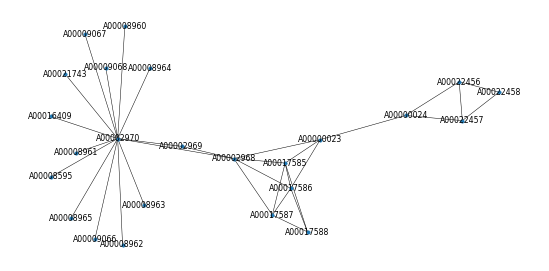

In [0]:
#Co-authorship network of a given author, up to 3 hops
name = "Peter B. Luh"
co_authors_3_df = (co_authors_graph
                       .find("(a)-[e1]->(b); (b)-[e2]->(c); (c)-[e3]->(d)")
                       .filter("a.name == 'Peter B. Luh'")
                       .filter("b.type == 'author'").filter("c.type == 'author'").filter("d.type == 'author'")
                      )

res_vrtx = (co_authors_3_df
              .select("a")
              .union(co_authors_3_df.select("b"))
              .union(co_authors_3_df.select("c"))
              .union(co_authors_3_df.select("d"))
              .distinct()
              .select("a.*", "*")
              .select("id", "name", "type")
             )

res_edges = (co_authors_3_df
              .select("e1")
              .union(co_authors_3_df.select("e2"))
              .union(co_authors_3_df.select("e3"))
              .distinct()
              .select("e1.*", "*")
              .select("src", "dst", "title")
             )

co_authors_3_graph = gf.GraphFrame(res_vrtx, res_edges)
PlotGraph(co_authors_3_graph.edges)

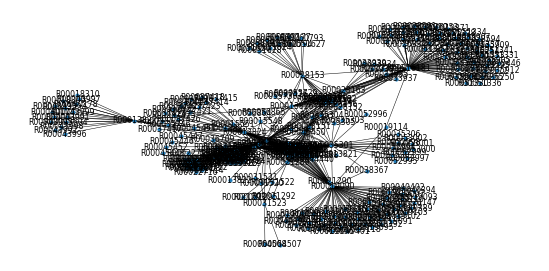

In [0]:
#Co-authorship network of a given author, up to 3 hops
reference = "53e9b2bfb7602d9703d6cb3b"
cites_3_df = (cites
                       .find("(a)-[e1]->(b); (b)-[e2]->(c); (c)-[e3]->(d)")
                       .filter("a.reference == '53e9b2bfb7602d9703d6cb3b'")
                       .filter("b.type == 'reference'").filter("c.type == 'reference'").filter("d.type == 'reference'")
                      )

res_vrtx = (cites_3_df
              .select("a")
              .union(cites_3_df.select("b"))
              .union(cites_3_df.select("c"))
              .union(cites_3_df.select("d"))
              .distinct()
              .select("a.*", "*")
              .select("id", "reference", "type")
             )

res_edges = (cites_3_df
              .select("e1")
              .union(cites_3_df.select("e2"))
              .union(cites_3_df.select("e3"))
              .distinct()
              .select("e1.*", "*")
              .select("src", "dst", "title")
             )

cite_3_graph = gf.GraphFrame(res_vrtx, res_edges)
PlotGraph(cite_3_graph.edges)

### PageRank

In [0]:
# Run PageRank algorithm
cite_page_rank = cites.pageRank(resetProbability=0.15, maxIter=10)

In [0]:
display(cite_page_rank.vertices.select("id", "pagerank").limit(100))

id pagerank R00000000 0.35346938944975764 R00000001 0.3963906724543711 R00000002 0.4525460177187403 R00000003 0.5294788407309262 R00000004 0.641993094386248 R00000005 0.8238911377956849 R00000006 1.174044871358851 R00000007 1.183549044126994 R00000008 0.35346938944975764 R00000009 0.3659880969927699 R00000010 0.40055363948653155 R00000011 0.4856712878774194 R00000012 0.6232781527760217 R00000013 0.8881713677058309 R00000014 1.6431170302557867 R00000015 0.35346938944975764 R00000016 0.37850680453578217 R00000017 0.40775505761354713 R00000018 0.44241423751069864 R00000019 0.4603214804575603 R00000020 0.4681469456253388 R00000021 0.5249933604512728 R00000022 0.5312784922313232 R00000023 0.5463313828445441 R00000024 0.5490470651569291 R00000025 0.704610400284763 R00000026 1.0040698204129477 R00000027 1.8638143005782541 R00000028 0.37519484794883895 R00000029 0.3618265854576235 R00000030 0.39111730904247405 R00000031 0.40972784354179465 R00000032 0.35346938944975764 R00000033 0.35346938944975764 R00000034 0.4285816347078312 R00000035 0.5500130978750499 R00000036 0.7837686644719462 R00000037 1.4499720292731006 R00000038 0.35346938944975764 R00000039 0.40354421962180664 R00000040 0.4721467369575138 R00000041 0.5724779185609855 R00000042 0.734679995486598 R00000043 1.0469189935684022 R00000044 1.936800138101544 R00000045 0.35346938944975764 R00000046 0.5036938799659046 R00000047 0.9318336779369236 R00000048 0.35346938944975764 R00000049 0.5036938799659046 R00000050 0.581537479596999 R00000051 0.35346938944975764 R00000052 0.5036938799659046 R00000053 0.9329019867316024 R00000054 0.35346938944975764 R00000055 0.372247450764276 R00000056 0.3803605362296513 R00000057 0.4034538545007373 R00000058 0.42983352960270854 R00000059 0.44057936784277624 R00000060 0.47462413717608165 R00000061 0.479157064328887 R00000062 0.5396895524639327 R00000063 0.5323200305123414 R00000064 0.5433559335839435 R00000065 0.6248642846614105 R00000066 0.6265800003556726 R00000067 0.7750427476024041 R00000068 0.7766202078023248 R00000069 1.1066837974682382 R00000070 2.047365077009786 R00000071 0.35346938944975764 R00000072 0.41355918565621647 R00000073 0.5014405126081625 R00000074 0.6435153245138086 R00000075 0.9170093374321772 R00000076 1.6964672742495275 R00000077 0.35346938944975764 R00000078 0.36382969914052643 R00000079 0.3748745292930067 R00000080 0.3866761348448236 R00000081 0.39931747002244283 R00000082 0.41289426400320584 R00000083 0.42751760251998605 R00000084 0.44331716609137684 R00000085 0.4604453293267255 R00000086 0.47908240218042625 R00000087 0.4858694028779841 R00000088 0.507605665638342 R00000089 0.5315759331825921 R00000090 0.5581547298429773 R00000091 0.5878066998717636 R00000092 0.6211157462215914 R00000093 0.6588263451856882 R00000094 0.6768909386430976 R00000095 0.7248373806986461 R00000096 0.7808475437230908 R00000097 0.8472195904052676 R00000098 0.927234790375912 R00000099 0.9929139541907814